In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Libraries:**

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
#import for
import torch
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt


#import for text
from transformers import BertTokenizer, BertModel
#import for audio
import seaborn as sns
import librosa
import soundfile as sf

In [ ]:
df_main="/content/drive/MyDrive/PROCESS-V1/PROCESS-V1"
df_dem=pd.read_csv("/content/drive/MyDrive/PROCESS-V1/PROCESS-V1/dem-info.csv")


# **EDA**


In [ ]:
df_dem=df_dem.drop_duplicates()
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Record-ID       157 non-null    object 
 1   TrainOrDev      157 non-null    object 
 2   Class           157 non-null    object 
 3   Gender          157 non-null    object 
 4   Age             157 non-null    object 
 5   Converted-MMSE  69 non-null     float64
dtypes: float64(1), object(5)
memory usage: 7.5+ KB


In [ ]:
print(df_dem.head(5))

         Record-ID TrainOrDev Class  Gender Age  Converted-MMSE
0  Process-rec-001      train   MCI    male  62            25.0
1  Process-rec-002        dev   MCI    male  61            25.0
2  Process-rec-003      train   MCI  female  62            29.0
3  Process-rec-004        dev   MCI  female  67            29.0
4  Process-rec-005      train   MCI    male  65            27.0


In [ ]:
df_dem.shape

(157, 6)

<Axes: xlabel='Class', ylabel='count'>

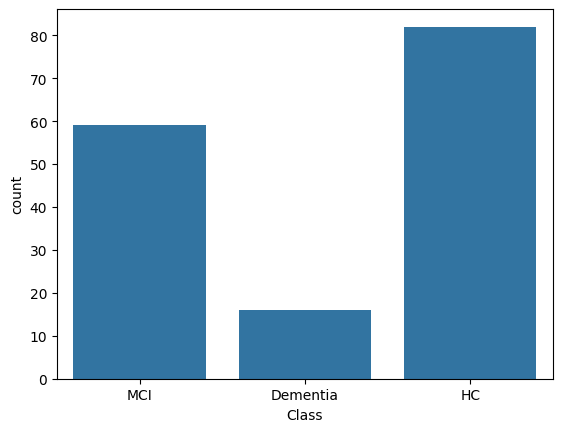

In [ ]:
import seaborn as sns
sns.countplot(x="Class", data=df_dem)

<Axes: ylabel='count'>

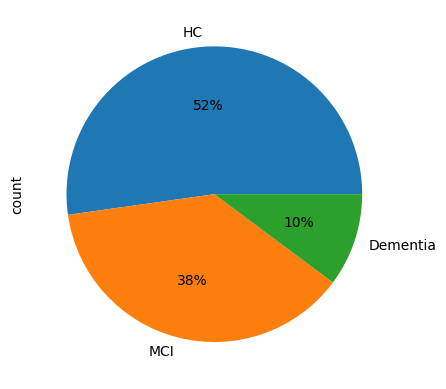

In [ ]:
df_dem['Class'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

In [ ]:
df_dem.Class.value_counts()

,count
Class,
HC,82
MCI,59
Dementia,16


In [ ]:
df_dem["Record-ID"] = df_dem["Record-ID"].str.replace("Process-rec-", "", regex=False)


In [ ]:
df_dem.isnull().sum()

,0
Record-ID,0
TrainOrDev,0
Class,0
Gender,0
Age,0
Converted-MMSE,88


KNN Imputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
df_dem['Converted-MMSE'] = knn_imputer.fit_transform(df_dem[['Converted-MMSE']])
print(df_dem['Converted-MMSE'])
print(df_dem['Converted-MMSE'].describe())

0      25.0
1      25.0
2      29.0
3      29.0
4      27.0
       ... 
152    28.0
153    30.0
154    29.0
155    26.0
156    28.0
Name: Converted-MMSE, Length: 157, dtype: float64
count    157.000000
mean      27.362319
std        1.628949
min       19.000000
25%       27.362319
50%       27.362319
75%       28.000000
max       30.000000
Name: Converted-MMSE, dtype: float64


In [ ]:
import pandas as pd
import numpy as np

# Assuming df_dem is your DataFrame
# Replace asterisked ages with NaN
df_dem['Age'] = df_dem['Age'].replace(r'\*', np.nan, regex=True)

# Convert the column to numeric, forcing errors to NaN
df_dem['Age'] = pd.to_numeric(df_dem['Age'], errors='coerce')

# Find the number of missing (NaN) ages
missing_ages_count = df_dem['Age'].isna().sum()

# Print the result
print(f"Number of missing or asterisked ages: {missing_ages_count}")

# Impute the missing values with the mean of the column
mean_age = df_dem['Age'].mean()

# Fill missing values with the mean
df_dem['Age'].fillna(mean_age, inplace=True)

# Convert the 'Age' column back to integers
df_dem['Age'] = df_dem['Age'].astype(int)

# Verify that the missing values have been filled and the column is still in integer format
missing_ages_after_imputation = df_dem['Age'].isna().sum()
print(f"Number of missing ages after imputation: {missing_ages_after_imputation}")
print(f"Data type of 'Age' column: {df_dem['Age'].dtype}")




Number of missing or asterisked ages: 31
Number of missing ages after imputation: 0
Data type of 'Age' column: int64


<ipython-input-86-36a55d6b1f6f>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dem['Age'].fillna(mean_age, inplace=True)


## **Encoding Class/Gender/Train/Dev**

In [ ]:
df_dem['Class'] = df_dem['Class'].map({'HC': 0, 'MCI': 1, 'Dementia': 2})
print(df_dem.head())

  Record-ID TrainOrDev  Class  Gender  Age  Converted-MMSE
0       001      train      1    male   62            25.0
1       002        dev      1    male   61            25.0
2       003      train      1  female   62            29.0
3       004        dev      1  female   67            29.0
4       005      train      1    male   65            27.0


In [ ]:
df_dem['Gender'] = df_dem['Gender'].map({'male': 0, 'female': 1})
df_dem.head()


,Record-ID,TrainOrDev,Class,Gender,Age,Converted-MMSE
0,001,train,1,0.0,62,25.0
1,002,dev,1,0.0,61,25.0
2,003,train,1,1.0,62,29.0
3,004,dev,1,1.0,67,29.0
4,005,train,1,0.0,65,27.0


In [ ]:
df_dem['TrainOrDev'] = df_dem['TrainOrDev'].map({'train': 0, 'dev': 1})

In [ ]:
print(df_dem.head())

  Record-ID  TrainOrDev  Class  Gender  Age  Converted-MMSE
0       001           0      1     0.0   62            25.0
1       002           1      1     0.0   61            25.0
2       003           0      1     1.0   62            29.0
3       004           1      1     1.0   67            29.0
4       005           0      1     0.0   65            27.0


<Axes: >

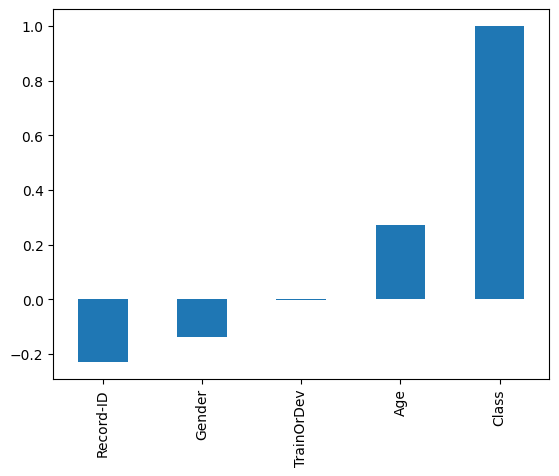

In [ ]:
df_dem.corr()['Class'][:-1].sort_values().plot(kind='bar')

<Axes: >

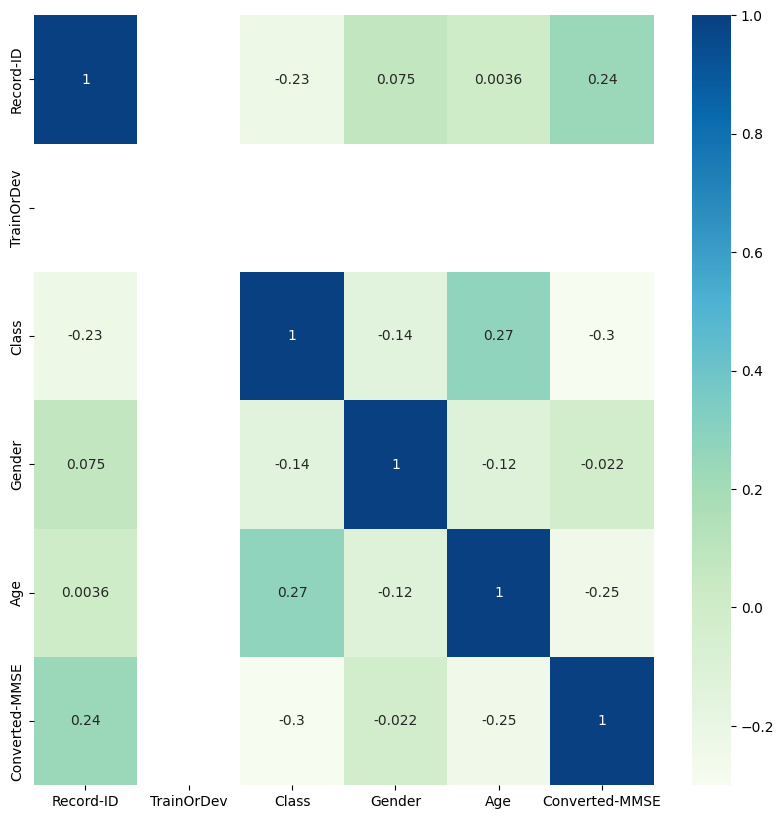

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
sns.heatmap(df_dem.corr(), annot = True, cmap= "GnBu")

## **We are dropping unncessary feartures **

In [ ]:
df_dem = df_dem.drop(['Gender'], axis=1)  # If deemed irrelevant


In [ ]:

# draw data
def plot_data(data, plot_type, grid_size, fig_size, y = None):
    fig = plt.figure(figsize = fig_size)
    column_names = data.select_dtypes(exclude='object').columns
    for i, column_name in enumerate(column_names):
        fig.add_subplot(grid_size[0], grid_size[1], i + 1)
        if plot_type == 'hist':
            plot = sns.histplot(data[column_name], kde = True, color = 'red')
        elif plot_type == 'boxplot':
             plot = sns.boxplot(y=data[column_name], x=y, color = 'red')
        else:
            raise ValueError("Input value for the parameter 'plot_type' should be 'hist' or 'boxplot'.")
        plot.set_xlabel(column_name, fontsize = 16)
    plt.tight_layout()

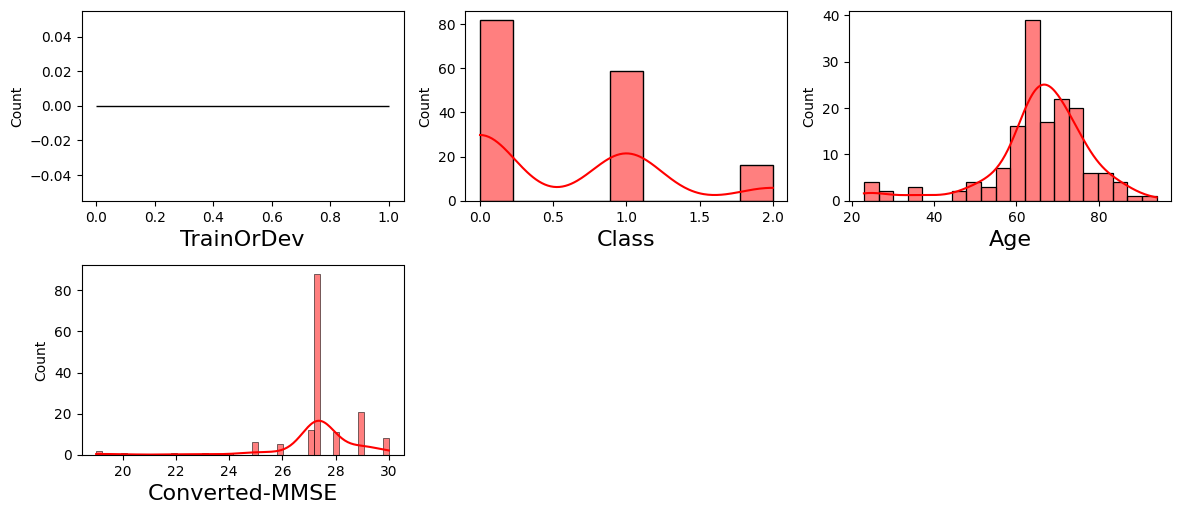

In [ ]:
plot_data(df_dem, plot_type = 'hist', grid_size = (8,3), fig_size = (12, 20))

ValueError: List of boxplot statistics and `positions` values must have same the length

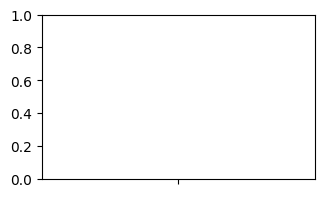

In [ ]:
plot_data(df_dem, plot_type = 'boxplot', grid_size = (8,3), fig_size = (12, 20))

## **Audio**

In [ ]:
data = []
for folder in os.listdir(df_main):
    folder_path = os.path.join(df_main, folder)


    if os.path.isdir(folder_path) and folder.startswith('Process-rec-'):

        unique_id = folder.split('-')[-1]


        patient_data = {'Unique_ID': unique_id}


        for task in ['CTD', 'SFT', 'PFT']:
            audio_file = glob.glob(os.path.join(folder_path, f'Process-rec-{unique_id}__{task}*.wav'))
            #transcript_file = glob.glob(os.path.join(folder_path, f'Process-rec-{unique_id}__{task}*.txt'))

            patient_data[f'{task}_audio'] = audio_file[0] if audio_file else None
            #patient_data[f'{task}_transcript'] = transcript_file[0] if transcript_file else None
        data.append(patient_data)

In [ ]:
# test audio
datat = []
for folder in os.listdir("/content/drive/MyDrive/PROCESS-V1_test/PROCESS-V1_test"):
    folder_path = os.path.join("/content/drive/MyDrive/PROCESS-V1_test/PROCESS-V1_test", folder)


    if os.path.isdir(folder_path) and folder.startswith('Process-test-'):

        unique_id = folder.split('-')[-1]


        patient_datat = {'Unique_ID': unique_id}


        for task in ['CTD', 'SFT', 'PFT']:
            audio_filet = glob.glob(os.path.join(folder_path, f'Process-test-{unique_id}__{task}*.wav'))
            #transcript_file = glob.glob(os.path.join(folder_path, f'Process-rec-{unique_id}__{task}*.txt'))

            patient_datat[f'{task}_audio'] = audio_filet[0] if audio_filet else None
            #patient_data[f'{task}_transcript'] = transcript_file[0] if transcript_file else None
        datat.append(patient_datat)

In [ ]:
test_audio = pd.DataFrame(datat)
test_audio.head(5)


,Unique_ID,CTD_audio,SFT_audio,PFT_audio
0,006,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...
1,010,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...
2,004,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...
3,003,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...
4,007,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...,/content/drive/MyDrive/PROCESS-V1_test/PROCESS...


In [ ]:
audio_df = pd.DataFrame(data)
audio_df.head(5)
audio_df.shape

NameError: name 'data' is not defined

In [ ]:
null_values = audio_df.isnull().sum()
print(null_values)

NameError: name 'audio_df' is not defined

In [ ]:
audio_df.info()
audio_df.describe()
audio_df.head()

NameError: name 'audio_df' is not defined

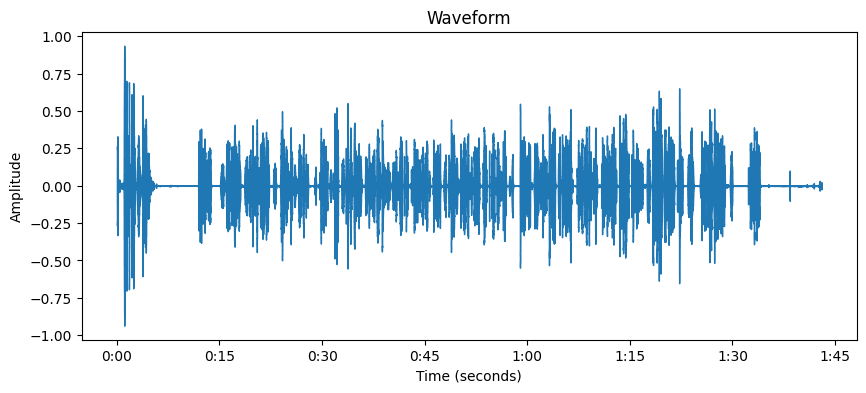

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file (replace 'audio_file.wav' with your file path)
y, sr = librosa.load(audio_df['CTD_audio'][0])

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

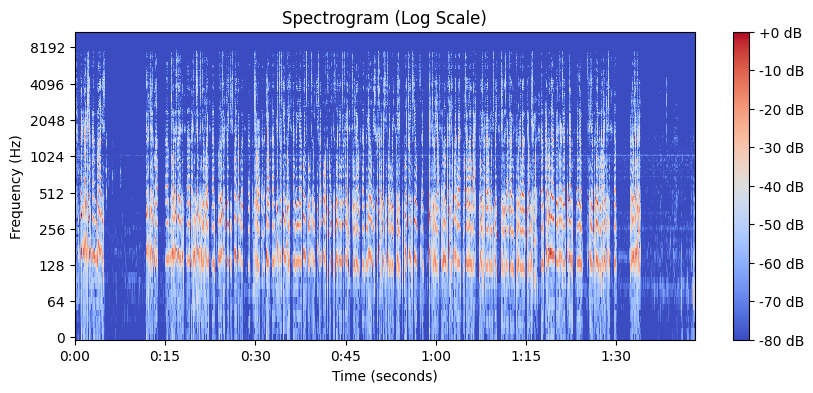

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load audio file
y, sr = librosa.load(audio_df['CTD_audio'][0])

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log Scale)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.show()

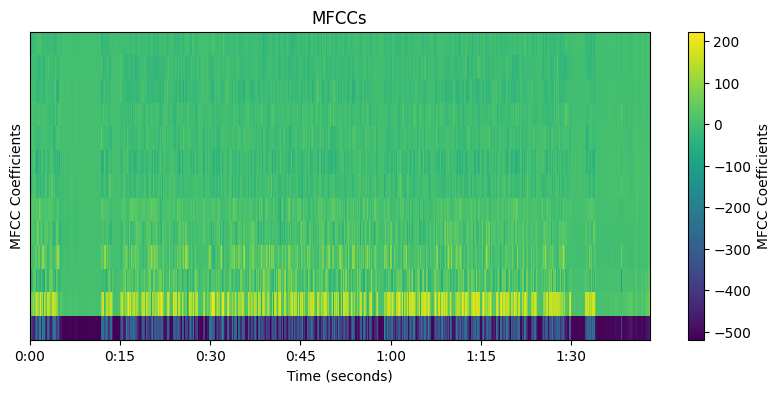

In [ ]:
# Extract MFCCs
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='viridis')
plt.colorbar(label='MFCC Coefficients')
plt.title('MFCCs')
plt.xlabel('Time (seconds)')
plt.ylabel('MFCC Coefficients')
plt.show()


In [ ]:
mean = np.mean(y)
median = np.median(y)
variance = np.var(y)
print(f"Mean: {mean}, Median: {median}, Variance: {variance}")

Mean: 5.54544385522604e-06, Median: -5.949827027507126e-05, Variance: 0.005149197764694691


# **Reduce noise in Audio**

In [ ]:
pip install noisereduce

In [ ]:
from concurrent.futures import ThreadPoolExecutor
import os
import librosa
import librosa.util
import soundfile as sf
import noisereduce as nr
import pandas as pd

TARGET_SR = 16000

def process_audio(entry, task):
    """
    Process an individual audio file for a given entry and task.
    """
    audio_path = entry[f'{task}_audio']
    if audio_path:
        try:
            y, sr = librosa.load(audio_path, sr=None)
            if sr != TARGET_SR:
                y = librosa.resample(y, orig_sr=sr, target_sr=TARGET_SR)

            # Normalize the audio
            y = librosa.util.normalize(y)

            # Apply noise reduction
            y = nr.reduce_noise(y=y, sr=TARGET_SR)


            output_path = os.path.join("normalized_audio", f"{entry['Unique_ID']}_{task}.wav")
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            sf.write(output_path, y, TARGET_SR)


            return (task, output_path)
        except Exception as e:
            print(f"Error processing {audio_path} for task {task}: {e}")
            return (task, None)
    return (task, None)


def process_entry(entry):
    """
    Process all tasks for a given entry and return updated entry.
    """
    results = {}
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_audio, entry, task): task for task in ['CTD', 'SFT', 'PFT']}
        for future in futures:
            task, output_path = future.result()
            results[f'{task}_audio'] = output_path


    processed_entry = {'Unique_ID': entry['Unique_ID']}
    processed_entry.update(results)
    #for task in ['CTD', 'SFT', 'PFT']:
        #processed_entry[f'{task}_transcript'] = entry.get(f'{task}_transcript', None)

    return processed_entry



processed_data = []
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(process_entry, entry): entry for entry in data}
    for future in futures:
        processed_data.append(future.result())

audio_df = pd.DataFrame(processed_data)


NameError: name 'data' is not defined

In [ ]:
#test audio
from concurrent.futures import ThreadPoolExecutor
import os
import librosa
import librosa.util
import soundfile as sf
import noisereduce as nr
import pandas as pd

TARGET_SR = 16000

def process_audio(entry, task):
    """
    Process an individual audio file for a given entry and task.
    """
    audio_path = entry[f'{task}_audio']
    if audio_path:
        try:
            y, sr = librosa.load(audio_path, sr=None)
            if sr != TARGET_SR:
                y = librosa.resample(y, orig_sr=sr, target_sr=TARGET_SR)

            # Normalize the audio
            y = librosa.util.normalize(y)

            # Apply noise reduction
            y = nr.reduce_noise(y=y, sr=TARGET_SR)


            output_path = os.path.join("test_normalized_audio", f"{entry['Unique_ID']}_{task}.wav")
            os.makedirs(os.path.dirname(output_path), exist_ok=True)
            sf.write(output_path, y, TARGET_SR)


            return (task, output_path)
        except Exception as e:
            print(f"Error processing {audio_path} for task {task}: {e}")
            return (task, None)
    return (task, None)


def process_entry(entry):
    """
    Process all tasks for a given entry and return updated entry.
    """
    results = {}
    with ThreadPoolExecutor() as executor:
        futures = {executor.submit(process_audio, entry, task): task for task in ['CTD', 'SFT', 'PFT']}
        for future in futures:
            task, output_path = future.result()
            results[f'{task}_audio'] = output_path


    processed_entry = {'Unique_ID': entry['Unique_ID']}
    processed_entry.update(results)
    #for task in ['CTD', 'SFT', 'PFT']:
        #processed_entry[f'{task}_transcript'] = entry.get(f'{task}_transcript', None)

    return processed_entry



processed_data = []
with ThreadPoolExecutor() as executor:
    futures = {executor.submit(process_entry, entry): entry for entry in datat}
    for future in futures:
        processed_data.append(future.result())

test_audio = pd.DataFrame(processed_data)


In [ ]:
test_audio.head(5)

,Unique_ID,CTD_audio,SFT_audio,PFT_audio
0,006,test_normalized_audio/006_CTD.wav,test_normalized_audio/006_SFT.wav,test_normalized_audio/006_PFT.wav
1,010,test_normalized_audio/010_CTD.wav,test_normalized_audio/010_SFT.wav,test_normalized_audio/010_PFT.wav
2,004,test_normalized_audio/004_CTD.wav,test_normalized_audio/004_SFT.wav,test_normalized_audio/004_PFT.wav
3,003,test_normalized_audio/003_CTD.wav,test_normalized_audio/003_SFT.wav,test_normalized_audio/003_PFT.wav
4,007,test_normalized_audio/007_CTD.wav,test_normalized_audio/007_SFT.wav,test_normalized_audio/007_PFT.wav


In [ ]:
audio_df.head(5)

,Unique_ID,CTD_audio,SFT_audio,PFT_audio
0,001,normalized_audio/001_CTD.wav,normalized_audio/001_SFT.wav,normalized_audio/001_PFT.wav
1,006,normalized_audio/006_CTD.wav,normalized_audio/006_SFT.wav,normalized_audio/006_PFT.wav
2,004,normalized_audio/004_CTD.wav,normalized_audio/004_SFT.wav,normalized_audio/004_PFT.wav
3,007,normalized_audio/007_CTD.wav,normalized_audio/007_SFT.wav,normalized_audio/007_PFT.wav
4,008,normalized_audio/008_CTD.wav,normalized_audio/008_SFT.wav,normalized_audio/008_PFT.wav


In [ ]:
df_dem.head()

,Record-ID,TrainOrDev,Class,Age,Converted-MMSE
0,001,NaN,1,62,25.0
1,002,NaN,1,61,25.0
2,003,NaN,1,62,29.0
3,004,NaN,1,67,29.0
4,005,NaN,1,65,27.0


In [ ]:
audio_df['CTD_audio']

,CTD_audio
0,normalized_audio/001_CTD.wav
1,normalized_audio/006_CTD.wav
2,normalized_audio/004_CTD.wav
3,normalized_audio/007_CTD.wav
4,normalized_audio/008_CTD.wav
...,...
152,normalized_audio/155_CTD.wav
153,normalized_audio/152_CTD.wav
154,normalized_audio/154_CTD.wav
155,normalized_audio/157_CTD.wav


## **Audio Model**


## **egeMAPS with opensmile lib**

In [ ]:
# Merge the dataframes on 'Record-ID' from df_dem and 'Unique_ID' from audio_df
merged_df = pd.merge(audio_df, df_dem, left_on='Unique_ID', right_on='Record-ID', how='left')

# Check the result
merged_df.head()

,Unique_ID,CTD_audio,SFT_audio,PFT_audio,Record-ID,TrainOrDev,Class,Gender,Age,Converted-MMSE
0,001,normalized_audio/001_CTD.wav,normalized_audio/001_SFT.wav,normalized_audio/001_PFT.wav,001,0,1,0.0,62,25.000000
1,006,normalized_audio/006_CTD.wav,normalized_audio/006_SFT.wav,normalized_audio/006_PFT.wav,006,0,2,0.0,83,26.000000
2,004,normalized_audio/004_CTD.wav,normalized_audio/004_SFT.wav,normalized_audio/004_PFT.wav,004,1,1,1.0,67,29.000000
3,007,normalized_audio/007_CTD.wav,normalized_audio/007_SFT.wav,normalized_audio/007_PFT.wav,007,1,0,0.0,65,27.362319
4,008,normalized_audio/008_CTD.wav,normalized_audio/008_SFT.wav,normalized_audio/008_PFT.wav,008,1,1,1.0,62,25.000000


In [ ]:
merged_df.shape

(157, 10)

In [ ]:
def remove_outliers_iqr(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

merged_df= remove_outliers_iqr(merged_df, 'Converted-MMSE')



In [ ]:
class_counts = merged_df['Class'].value_counts()
print(class_counts)


Class
0    63
1    38
2    10
Name: count, dtype: int64


In [ ]:
merged_df.shape

(111, 9)

In [ ]:
merged_df.head()

,Unique_ID,CTD_audio,SFT_audio,PFT_audio,Record-ID,TrainOrDev,Class,Gender,Age,Converted-MMSE
3,007,normalized_audio/007_CTD.wav,normalized_audio/007_SFT.wav,normalized_audio/007_PFT.wav,007,1,0,0.0,65,27.362319
5,009,normalized_audio/009_CTD.wav,normalized_audio/009_SFT.wav,normalized_audio/009_PFT.wav,009,0,0,1.0,68,27.362319
6,010,normalized_audio/010_CTD.wav,normalized_audio/010_SFT.wav,normalized_audio/010_PFT.wav,010,0,0,1.0,77,27.362319
8,005,normalized_audio/005_CTD.wav,normalized_audio/005_SFT.wav,normalized_audio/005_PFT.wav,005,0,1,0.0,65,27.000000
11,019,normalized_audio/019_CTD.wav,normalized_audio/019_SFT.wav,normalized_audio/019_PFT.wav,019,0,1,0.0,70,27.000000


In [ ]:
!pip install opensmile



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 22.5 MB/s eta 0:00:00


In [ ]:
import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    # Extract features for each task
    ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    #sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    #pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([ctd_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)
    combined_features["Class"] = row["Class"]
    combined_features["Converted-MMSE"] = row["Converted-MMSE"]
    combined_features["Age"] = row["Age"]
    combined_features["TrainOrDev"] = row["TrainOrDev"]
    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
ctdfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
ctdfeatures_df = ctdfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
ctdfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(ctdfeatures_df.head())


100%|██████████| 111/111 [02:57<00:00,  1.60s/it]

   CTD_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              34.755283   
1                              35.732773   
2                              38.144989   
3                              31.212053   
4                              34.583267   

   CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.274073   
1                                    0.285347   
2                                    0.202352   
3                                    0.426771   
4                                    0.318114   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       28.151829   
1                                       29.913605   
2                                       34.339706   
3                                       21.443399   
4                                       26.122263   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       31.532257   
1              

In [ ]:
#####################################################33For TEsttttttttttttttttttttt

import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(test_audio.iterrows(), total=len(test_audio)):
    # Extract features for each task
    ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    #sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    #pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([ctd_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)
    # combined_features["Class"] = row["Class"]
    # combined_features["Converted-MMSE"] = row["Converted-MMSE"]
    # combined_features["Age"] = row["Age"]
    # combined_features["TrainOrDev"] = row["TrainOrDev"]
    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
ctdfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
ctdfeatures_df = ctdfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
ctdfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(ctdfeatures_df.head())


100%|██████████| 40/40 [02:00<00:00,  3.00s/it]

   CTD_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              32.461334   
1                              35.285961   
2                              33.249882   
3                              32.233788   
4                              37.220665   

   CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.471843   
1                                    0.292787   
2                                    0.382427   
3                                    0.389366   
4                                    0.276306   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       21.617558   
1                                       27.715845   
2                                       25.961826   
3                                       25.199455   
4                                       32.039394   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       23.830473   
1              

In [ ]:
import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    # Extract features for each task
    #ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    #pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([sft_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)

    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
sftfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
sftfeatures_df = sftfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
sftfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(sftfeatures_df.head())



100%|██████████| 111/111 [02:10<00:00,  1.18s/it]

   SFT_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              33.625095   
1                              36.527672   
2                              39.291039   
3                              31.252623   
4                              33.822014   

   SFT_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.296909   
1                                    0.309219   
2                                    0.206901   
3                                    0.406881   
4                                    0.322712   

   SFT_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       27.795170   
1                                       29.851650   
2                                       34.940536   
3                                       23.228386   
4                                       26.217127   

   SFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       29.917883   
1              

In [ ]:
#######################################################3  Testtttttttttttt SFTTTTTTTTTTTTTtttt

import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(test_audio.iterrows(), total=len(test_audio)):
    # Extract features for each task
    #ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    #pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([sft_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)

    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
sftfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
sftfeatures_df = sftfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
sftfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(sftfeatures_df.head())



100%|██████████| 40/40 [01:27<00:00,  2.19s/it]

   SFT_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              30.178291   
1                              33.304386   
2                              31.455900   
3                              36.101677   
4                              37.095909   

   SFT_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.502305   
1                                    0.350656   
2                                    0.365597   
3                                    0.395948   
4                                    0.251436   

   SFT_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       19.523630   
1                                       26.818562   
2                                       25.709106   
3                                       25.521120   
4                                       32.724655   

   SFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       23.852112   
1              

In [ ]:
import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(merged_df.iterrows(), total=len(merged_df)):
    # Extract features for each task
    #ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    #sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([pft_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)

    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
pftfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
pftfeatures_df = pftfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
pftfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(pftfeatures_df.head())



100%|██████████| 111/111 [02:02<00:00,  1.11s/it]

   PFT_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              35.957714   
1                              37.492203   
2                              39.484226   
3                              33.856636   
4                              34.287903   

   PFT_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.321179   
1                                    0.322634   
2                                    0.190263   
3                                    0.431192   
4                                    0.324396   

   PFT_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       28.107262   
1                                       30.222725   
2                                       36.359726   
3                                       23.617294   
4                                       26.175295   

   PFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       31.759783   
1              

In [ ]:
######################################33333 Test PFttttttttttttttttt

import opensmile
import pandas as pd
from tqdm import tqdm

# Initialize OpenSMILE
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Create an empty list to store features
feature_list = []

# Loop through each row in your audio DataFrame
for index, row in tqdm(test_audio.iterrows(), total=len(test_audio)):
    # Extract features for each task
    #ctd_features = smile.process_file(row["CTD_audio"]).add_prefix("CTD_")
    #sft_features = smile.process_file(row["SFT_audio"]).add_prefix("SFT_")
    pft_features = smile.process_file(row["PFT_audio"]).add_prefix("PFT_")

    # Combine features into a single row
    combined_features = pd.concat([pft_features], axis=1)

    # Add metadata (Class, MMSE, Age, etc.)

    combined_features["Unique_ID"] = row["Unique_ID"]  # Unique identifier for the patient

    # Append to the feature list
    feature_list.append(combined_features)

# Combine the features into a single DataFrame (one row per patient)
pftfeatures_df = pd.concat(feature_list, ignore_index=True)

# Drop duplicate rows for the same patient (just in case)
pftfeatures_df = pftfeatures_df.drop_duplicates(subset=["Unique_ID"])

# Reset the index
pftfeatures_df.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(pftfeatures_df.head())



100%|██████████| 40/40 [01:08<00:00,  1.71s/it]

   PFT_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              35.535213   
1                              35.268539   
2                              31.013678   
3                              37.870811   
4                              39.403934   

   PFT_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.455368   
1                                    0.347803   
2                                    0.343691   
3                                    0.377902   
4                                    0.243717   

   PFT_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       20.810583   
1                                       26.862429   
2                                       26.143152   
3                                       25.983435   
4                                       33.563049   

   PFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       27.853632   
1              

In [ ]:


# Merge the DataFrames on Unique_ID
combined_df = pd.merge(ctdfeatures_df, sftfeatures_df, on="Unique_ID", how="inner")
combined_df = pd.merge(combined_df, pftfeatures_df, on="Unique_ID", how="inner")




NameError: name 'ctdfeatures_df' is not defined

In [ ]:
test_f = pd.merge(ctdfeatures_df, sftfeatures_df, on="Unique_ID", how="inner")
test_f = pd.merge(test_f, pftfeatures_df, on="Unique_ID", how="inner")


In [ ]:
test_f.head()

,CTD_F0semitoneFrom27.5Hz_sma3nz_amean,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile80.0,CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,PFT_slopeUV0-500_sma3nz_amean,PFT_slopeUV500-1500_sma3nz_amean,PFT_spectralFluxUV_sma3nz_amean,PFT_loudnessPeaksPerSec,PFT_VoicedSegmentsPerSec,PFT_MeanVoicedSegmentLengthSec,PFT_StddevVoicedSegmentLengthSec,PFT_MeanUnvoicedSegmentLength,PFT_StddevUnvoicedSegmentLength,PFT_equivalentSoundLevel_dBp
0,32.461334,0.471843,21.617558,23.830473,55.679428,34.061871,842.744385,997.492432,262.463440,163.874680,...,0.068678,0.060332,0.031382,0.613700,0.846614,0.186274,0.155689,1.127045,2.161206,-34.067497
1,35.285961,0.292787,27.715845,30.951332,41.471252,13.755407,402.438324,580.141052,412.175354,645.108032,...,-0.004101,0.032730,0.026623,0.656210,1.297453,0.117284,0.129834,0.672105,1.036287,-31.991051
2,33.249882,0.382427,25.961826,27.038378,50.469856,24.508030,833.903748,1006.107788,143.048447,116.398392,...,0.041411,0.048927,0.023835,1.036352,1.308441,0.188902,0.149821,0.543735,0.878464,-28.293890
3,32.233788,0.389366,25.199455,26.673700,34.141438,8.941982,835.649170,1151.091553,191.795776,187.407578,...,0.026079,0.046084,0.039729,1.098231,1.358571,0.130674,0.148209,0.625060,0.784694,-26.198143
4,37.220665,0.276306,32.039394,33.506721,37.702686,5.663292,236.136749,221.950531,145.551117,230.006897,...,0.034759,0.050452,0.008590,0.263288,0.312912,0.128947,0.100152,2.309200,3.254826,-34.695946


In [ ]:
import pandas as pd

In [ ]:
# Save the final DataFrame to a CSV file
combined_df.to_csv("regression_features.csv", index=False)

print("Merged DataFrame saved as 'regression_features.csv'")

NameError: name 'combined_df' is not defined

In [ ]:
# from scipy.stats import zscore

# # Calculate Z-scores for 'Age' and 'Converted-MMSE'
# z_scores_age = zscore(combined_df['Age'])
# z_scores_mmse = zscore(combined_df['Converted-MMSE'])

# # Define Z-score threshold (e.g., 3 for 99.7% within normal range)
# threshold = 3

# # Identify outliers
# age_outliers = abs(z_scores_age) > threshold
# mmse_outliers = abs(z_scores_mmse) > threshold

# # Cap the outliers instead of removing them
# combined_df.loc[age_outliers, 'Age'] = combined_df.loc[~age_outliers, 'Age'].median()
# combined_df.loc[mmse_outliers, 'Converted-MMSE'] = combined_df.loc[~mmse_outliers, 'Converted-MMSE'].median()



<ipython-input-41-98c9185b76cf>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '66.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  combined_df.loc[age_outliers, 'Age'] = combined_df.loc[~age_outliers, 'Age'].median()


In [ ]:
combined_df.head()

,CTD_F0semitoneFrom27.5Hz_sma3nz_amean,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile80.0,CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,PFT_slopeUV0-500_sma3nz_amean,PFT_slopeUV500-1500_sma3nz_amean,PFT_spectralFluxUV_sma3nz_amean,PFT_loudnessPeaksPerSec,PFT_VoicedSegmentsPerSec,PFT_MeanVoicedSegmentLengthSec,PFT_StddevVoicedSegmentLengthSec,PFT_MeanUnvoicedSegmentLength,PFT_StddevUnvoicedSegmentLength,PFT_equivalentSoundLevel_dBp
0,34.755283,0.274073,28.151829,31.532257,39.843807,11.691978,548.258606,800.424866,214.436081,280.668182,...,0.025505,0.048038,0.004252,0.315143,0.531209,0.190000,0.176706,1.724839,4.960248,-32.637794
1,35.732773,0.285347,29.913605,31.582468,36.026085,6.112480,640.109802,912.580017,267.351410,396.492188,...,0.032930,0.046543,0.042099,1.185111,1.369863,0.136585,0.128340,0.592785,0.882261,-26.666611
2,38.144989,0.202352,34.339706,36.228973,38.958607,4.618900,502.452606,731.553223,180.071396,217.665268,...,0.069856,0.058319,0.026080,0.500083,0.784510,0.161064,0.166889,1.115000,1.352853,-34.061092
3,31.212053,0.426771,21.443399,23.764099,40.529102,19.085703,768.722656,1044.974365,191.384018,123.850479,...,0.031229,0.049757,0.029537,1.067913,1.686707,0.160000,0.172592,0.444516,0.711956,-30.204962
4,34.583267,0.318114,26.122263,29.527603,40.477840,14.355577,548.008545,819.723083,204.054520,175.805359,...,0.038785,0.050191,0.022214,0.711929,1.025374,0.172034,0.180787,0.718750,1.699167,-30.268587


In [ ]:
merged_df.head()

,Unique_ID,CTD_audio,SFT_audio,PFT_audio,Record-ID,TrainOrDev,Class,Gender,Age,Converted-MMSE
3,007,normalized_audio/007_CTD.wav,normalized_audio/007_SFT.wav,normalized_audio/007_PFT.wav,007,1,0,0.0,65,27.362319
5,009,normalized_audio/009_CTD.wav,normalized_audio/009_SFT.wav,normalized_audio/009_PFT.wav,009,0,0,1.0,68,27.362319
6,010,normalized_audio/010_CTD.wav,normalized_audio/010_SFT.wav,normalized_audio/010_PFT.wav,010,0,0,1.0,77,27.362319
8,005,normalized_audio/005_CTD.wav,normalized_audio/005_SFT.wav,normalized_audio/005_PFT.wav,005,0,1,0.0,65,27.000000
11,019,normalized_audio/019_CTD.wav,normalized_audio/019_SFT.wav,normalized_audio/019_PFT.wav,019,0,1,0.0,70,27.000000


In [ ]:
pip install imbalanced-learn


In [ ]:
combined_df = pd.read_csv('regression_features.csv')

# Classification

In [ ]:
combined_df.head()

,CTD_F0semitoneFrom27.5Hz_sma3nz_amean,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile80.0,CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,PFT_slopeUV0-500_sma3nz_amean,PFT_slopeUV500-1500_sma3nz_amean,PFT_spectralFluxUV_sma3nz_amean,PFT_loudnessPeaksPerSec,PFT_VoicedSegmentsPerSec,PFT_MeanVoicedSegmentLengthSec,PFT_StddevVoicedSegmentLengthSec,PFT_MeanUnvoicedSegmentLength,PFT_StddevUnvoicedSegmentLength,PFT_equivalentSoundLevel_dBp
0,34.755283,0.274073,28.151829,31.532257,39.843807,11.691978,548.25860,800.42487,214.43608,280.66818,...,0.025505,0.048038,0.004252,0.315144,0.531208,0.190000,0.176706,1.724839,4.960248,-32.637794
1,35.732773,0.285347,29.913605,31.582468,36.026085,6.112480,640.10980,912.58000,267.35140,396.49220,...,0.032930,0.046543,0.042099,1.185111,1.369863,0.136585,0.128340,0.592785,0.882261,-26.666610
2,38.144990,0.202352,34.339706,36.228973,38.958607,4.618900,502.45260,731.55320,180.07140,217.66527,...,0.069856,0.058319,0.026080,0.500083,0.784510,0.161064,0.166889,1.115000,1.352853,-34.061092
3,31.212053,0.426771,21.443400,23.764100,40.529102,19.085703,768.72266,1044.97440,191.38402,123.85048,...,0.031229,0.049757,0.029537,1.067913,1.686707,0.160000,0.172592,0.444516,0.711956,-30.204962
4,34.583267,0.318113,26.122263,29.527603,40.477840,14.355577,548.00854,819.72310,204.05452,175.80536,...,0.038785,0.050191,0.022214,0.711929,1.025374,0.172034,0.180787,0.718750,1.699167,-30.268587


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:53:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:53:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


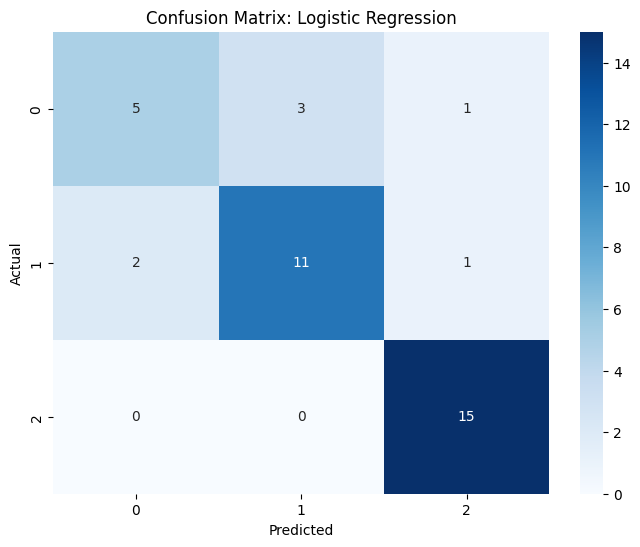

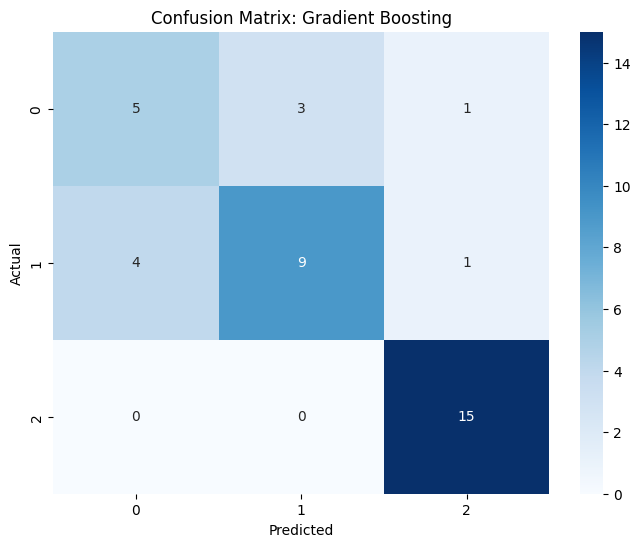

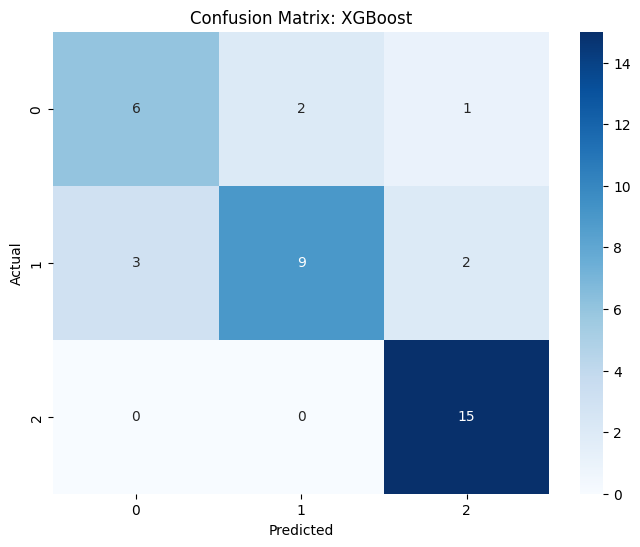

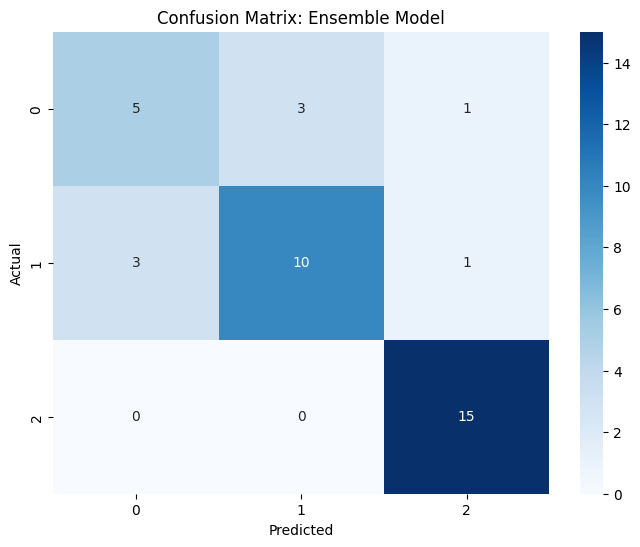

Model Evaluation Metrics:

                     Macro Precision  Macro Recall  Macro F1 Score  Accuracy
Model                                                                       
Logistic Regression         0.794118      0.780423        0.782738  0.815789
Gradient Boosting           0.729303      0.732804        0.728454  0.763158
XGBoost                     0.772727      0.769841        0.765253  0.789474
Ensemble Model              0.758861      0.756614        0.755492  0.789474


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    metrics = precision_recall_fscore_support(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    return {
        "Model": model_name,
        "Macro Precision": metrics[0],
        "Macro Recall": metrics[1],
        "Macro F1 Score": metrics[2],
        "Accuracy": accuracy
    }

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name, class_labels):
    cm = confusion_matrix(y_true, y_pred, labels=class_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Target variable
target = 'Class'
X = combined_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'TrainOrDev', 'Age'], axis=1)
y = combined_df[target]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize models
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit models
logreg_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predictions
logreg_preds = logreg_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Ensemble Model (Voting Classifier)
ensemble_model = VotingClassifier(
    estimators=[
        ('Logistic Regression', logreg_model),
        ('Gradient Boosting', gb_model),
        ('XGBoost', xgb_model)
    ],
    voting='soft'  # Use probabilities for better performance
)
ensemble_model.fit(X_train, y_train)
ensemble_preds = ensemble_model.predict(X_test)

# Evaluate all models
models = {
    "Logistic Regression": logreg_preds,
    "Gradient Boosting": gb_preds,
    "XGBoost": xgb_preds,
    "Ensemble Model": ensemble_preds
}

results = []
class_labels = sorted(y.unique())  # Ensure consistent label order

for model_name, preds in models.items():
    # Append evaluation results
    results.append(evaluate_model(y_test, preds, model_name))
    # Plot confusion matrix
    plot_confusion_matrix(y_test, preds, model_name, class_labels)

# Display results
results_df = pd.DataFrame(results).set_index("Model")
print("Model Evaluation Metrics:\n")
print(results_df)


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier

# Initialize Lasso Regression
lasso_model = Lasso(alpha=0.01, max_iter=1000, random_state=42)  # Lasso Regression (treat output as classification)
lasso_model.fit(X_train, y_train)

# Predictions for Lasso Regression
y_pred_lasso_test = lasso_model.predict(X_test)
y_pred_lasso_test_class = [round(pred) for pred in y_pred_lasso_test]  # Convert Lasso predictions to class labels

# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # k=5 is common for KNN
knn_model.fit(X_train, y_train)

# Predictions for KNN
y_pred_knn_test = knn_model.predict(X_test)

# Mapping dictionary for prediction labels
label_mapping = {0: 'HC', 1: 'MCI', 2: 'Dementia'}

# Map predictions to class labels
y_pred_lasso_test_mapped = [label_mapping[pred] for pred in y_pred_lasso_test_class]
y_pred_knn_test_mapped = [label_mapping[pred] for pred in y_pred_knn_test]

# # Add predictions to the test data
# test_f["Lasso_Predictions"] = y_pred_lasso_test_mapped
# test_f["KNN_Predictions"] = y_pred_knn_test_mapped

# # Save the results to a CSV
# test_predictions = test_f[["Unique_ID", "Lasso_Predictions", "KNN_Predictions"]].drop_duplicates()
# test_predictions.to_csv('test_predictions_lasso_knn.csv', index=False)

# # Display the predictions
# print(test_predictions)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Perform grid search
grid_search = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best model
best_xgb = grid_search.best_estimator_
best_xgb_preds = best_xgb.predict(X_test)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
test_f.head()

,CTD_F0semitoneFrom27.5Hz_sma3nz_amean,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile80.0,CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,PFT_spectralFluxUV_sma3nz_amean,PFT_loudnessPeaksPerSec,PFT_VoicedSegmentsPerSec,PFT_MeanVoicedSegmentLengthSec,PFT_StddevVoicedSegmentLengthSec,PFT_MeanUnvoicedSegmentLength,PFT_StddevUnvoicedSegmentLength,PFT_equivalentSoundLevel_dBp,Random_Forest_Predictions,Gradient_Boosting_Predictions
0,32.461334,0.471843,21.617558,23.830473,55.679428,34.061871,842.744385,997.492432,262.463440,163.874680,...,0.031382,0.613700,0.846614,0.186274,0.155689,1.127045,2.161206,-34.067497,HC,HC
1,35.285961,0.292787,27.715845,30.951332,41.471252,13.755407,402.438324,580.141052,412.175354,645.108032,...,0.026623,0.656210,1.297453,0.117284,0.129834,0.672105,1.036287,-31.991051,HC,HC
2,33.249882,0.382427,25.961826,27.038378,50.469856,24.508030,833.903748,1006.107788,143.048447,116.398392,...,0.023835,1.036352,1.308441,0.188902,0.149821,0.543735,0.878464,-28.293890,HC,HC
3,32.233788,0.389366,25.199455,26.673700,34.141438,8.941982,835.649170,1151.091553,191.795776,187.407578,...,0.039729,1.098231,1.358571,0.130674,0.148209,0.625060,0.784694,-26.198143,HC,HC
4,37.220665,0.276306,32.039394,33.506721,37.702686,5.663292,236.136749,221.950531,145.551117,230.006897,...,0.008590,0.263288,0.312912,0.128947,0.100152,2.309200,3.254826,-34.695946,MCI,MCI


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:04:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


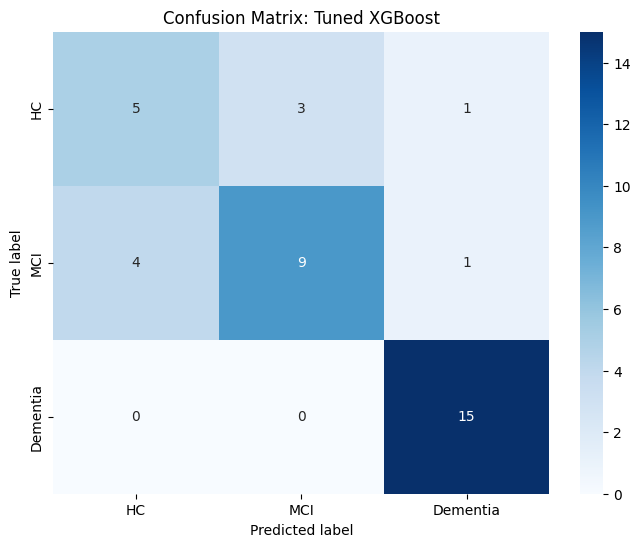

Tuned XGBoost Performance:
  0: {'precision': 0.5555555555555556, 'recall': 0.5555555555555556, 'f1-score': 0.5555555555555556, 'support': 9.0}
  1: {'precision': 0.75, 'recall': 0.6428571428571429, 'f1-score': 0.6923076923076923, 'support': 14.0}
  2: {'precision': 0.8823529411764706, 'recall': 1.0, 'f1-score': 0.9375, 'support': 15.0}
  accuracy: 0.7631578947368421
  macro avg: {'precision': 0.7293028322440088, 'recall': 0.7328042328042329, 'f1-score': 0.728454415954416, 'support': 38.0}
  weighted avg: {'precision': 0.7561919504643962, 'recall': 0.7631578947368421, 'f1-score': 0.7567054655870445, 'support': 38.0}


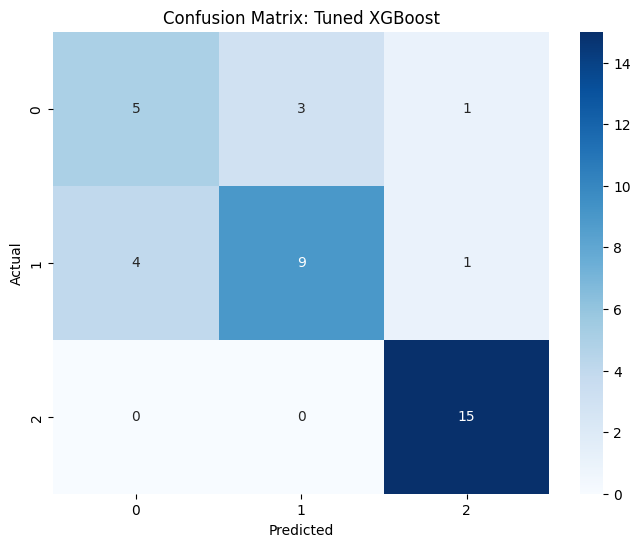

In [ ]:
# Fine-tuned XGBoost Model
tuned_xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
tuned_xgb_model.fit(X_train, y_train)

# Predict on the test set
tuned_xgb_preds = tuned_xgb_model.predict(X_test)

# Evaluate the model
tuned_xgb_metrics = evaluate_model(y_test, tuned_xgb_preds, "Tuned XGBoost")
print("Tuned XGBoost Performance:")
for metric, value in tuned_xgb_metrics.items():
    print(f"  {metric}: {value}")

# Plot the Confusion Matrix
plot_confusion_matrix(y_test, tuned_xgb_preds, "Tuned XGBoost", class_labels)


In [ ]:
# Feature importance analysis
feature_importances = pd.Series(tuned_xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Optional: Drop low-importance features
low_importance_features = feature_importances[feature_importances < 0.01].index
X_train_selected = pd.DataFrame(X_train, columns=X.columns).drop(columns=low_importance_features, axis=1)
X_test_selected = pd.DataFrame(X_test, columns=X.columns).drop(columns=low_importance_features, axis=1)

# Retrain with selected features
tuned_xgb_model.fit(X_train_selected, y_train)
selected_preds = tuned_xgb_model.predict(X_test_selected)
selected_metrics = evaluate_model(y_test, selected_preds, "XGBoost with Selected Features")
print("Performance with Selected Features:\n", selected_metrics)


Top 10 Important Features:
 PFT_loudness_sma3_amean                           0.054903
SFT_slopeV0-500_sma3nz_stddevNorm                 0.036348
CTD_loudness_sma3_percentile20.0                  0.030657
SFT_mfcc1V_sma3nz_stddevNorm                      0.029436
SFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0    0.023531
SFT_F3bandwidth_sma3nz_stddevNorm                 0.022217
CTD_StddevUnvoicedSegmentLength                   0.020340
SFT_slopeUV500-1500_sma3nz_amean                  0.020056
SFT_F1bandwidth_sma3nz_stddevNorm                 0.018870
PFT_F2amplitudeLogRelF0_sma3nz_stddevNorm         0.015044
dtype: float32


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:00:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance with Selected Features:
 {'Model': 'XGBoost with Selected Features', 'Macro Precision': 0.8111111111111112, 'Macro Recall': 0.7671957671957671, 'Macro F1 Score': 0.7693685624720108, 'Accuracy': 0.8157894736842105}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:09:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


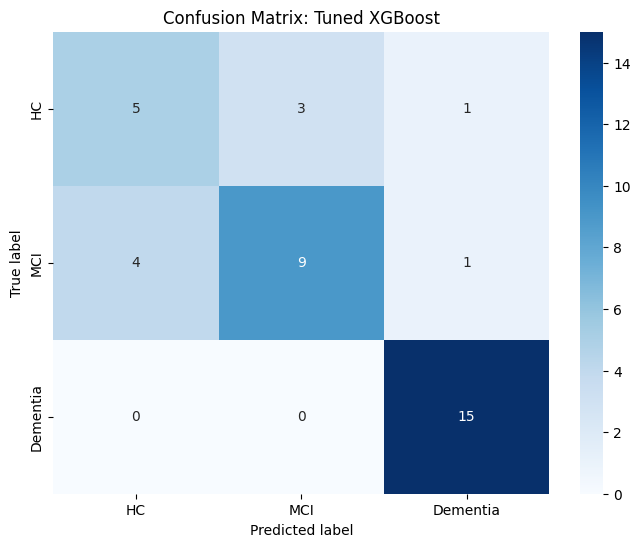

Tuned XGBoost Performance:
  0: {'precision': 0.5555555555555556, 'recall': 0.5555555555555556, 'f1-score': 0.5555555555555556, 'support': 9.0}
  1: {'precision': 0.75, 'recall': 0.6428571428571429, 'f1-score': 0.6923076923076923, 'support': 14.0}
  2: {'precision': 0.8823529411764706, 'recall': 1.0, 'f1-score': 0.9375, 'support': 15.0}
  accuracy: 0.7631578947368421
  macro avg: {'precision': 0.7293028322440088, 'recall': 0.7328042328042329, 'f1-score': 0.728454415954416, 'support': 38.0}
  weighted avg: {'precision': 0.7561919504643962, 'recall': 0.7631578947368421, 'f1-score': 0.7567054655870445, 'support': 38.0}


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Fine-tuned XGBoost Model
tuned_xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=5,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

# Train the model
tuned_xgb_model.fit(X_train, y_train)

# Predict on the test set
tuned_xgb_preds = tuned_xgb_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred)
    cm_fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["HC", "MCI", "Dementia"], yticklabels=["HC", "MCI", "Dementia"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return report

# Evaluate the performance
tuned_xgb_metrics = evaluate_model(y_test, tuned_xgb_preds, "Tuned XGBoost")
print("Tuned XGBoost Performance:")
for metric, value in tuned_xgb_metrics.items():
    print(f"  {metric}: {value}")

# Feature importance analysis
# Use original column names (keep X_train and X_test as they are)
feature_importances = pd.Series(tuned_xgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Optional: Drop low-importance features
low_importance_features = feature_importances[feature_importances < 0.01].index
X_train_selected = X_train.drop(columns=low_importance_features, axis=1)
X_test_selected = X_test.drop(columns=low_importance_features, axis=1)

# Retrain with selected features
tuned_xgb_model.fit(X_train_selected, y_train)
selected_preds = tuned_xgb_model.predict(X_test_selected)
selected_metrics = evaluate_model(y_test, selected_preds, "XGBoost with Selected Features")
print("Performance with Selected Features:\n", selected_metrics)

# Ensure that test_f contains all the features used in training
print(test_f.head())

# List the columns in test_f to check what exists
print(test_f.columns)

# Drop the Unique_ID column and any prediction columns that may exist
prediction_columns = ["Random_Forest_Predictions", "Gradient_Boosting_Predictions", "Ensemble_Predictions"]

# Remove any columns in prediction_columns that do not exist in test_f
test_features = test_f.drop(columns=["Unique_ID"] + [col for col in prediction_columns if col in test_f.columns])

# Keep only the features that were used during training (with original feature names)
# Align columns in test_features with the training set columns
test_features = test_features[X_train_selected.columns.intersection(test_features.columns)]

# Add missing columns with 0 values if any are missing in test_features (for compatibility)
missing_columns = set(X_train_selected.columns) - set(test_features.columns)
for col in missing_columns:
    test_features[col] = 0  # Add missing columns with 0 values

# Standardize the test features using the same scaler as training data
test_features_scaled = scaler.transform(test_features)

# Make predictions with the fine-tuned XGBoost model on the test data
test_predictions = tuned_xgb_model.predict(test_features_scaled)

# Mapping dictionary for prediction labels
label_mapping = {0: 'HC', 1: 'MCI', 2: 'Dementia'}

# Map predictions to labels
test_predictions_mapped = [label_mapping[pred] for pred in test_predictions]

# Add mapped predictions to the test_f dataframe
test_f["XGBoost_Predictions"] = test_predictions_mapped

# Ensure the result has one row per Unique_ID
test_predictions_final = test_f[["Unique_ID", "XGBoost_Predictions"]].drop_duplicates()

# Save the predictions to a CSV file
test_predictions_final.to_csv('test_predictions.csv', index=False)

# Display the predictions to check the result
print(test_predictions_final)


Tuned Gradient Boosting Performance:
  Model: Tuned Gradient Boosting
  Macro Precision: 0.7293028322440088
  Macro Recall: 0.7328042328042329
  Macro F1 Score: 0.728454415954416
  Accuracy: 0.7631578947368421


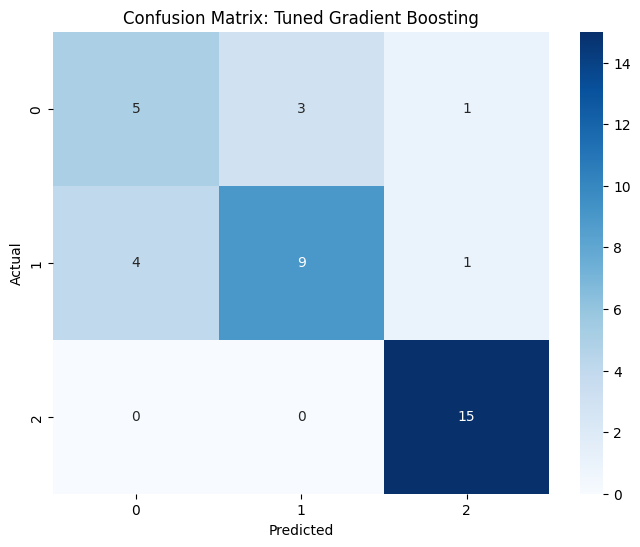

Top 10 Important Features for Gradient Boosting:
 SFT_mfcc4V_sma3nz_stddevNorm                         0.103387
CTD_StddevUnvoicedSegmentLength                      0.057657
CTD_mfcc1_sma3_stddevNorm                            0.049662
CTD_loudness_sma3_percentile20.0                     0.046070
SFT_mfcc2_sma3_amean                                 0.032114
CTD_slopeUV500-1500_sma3nz_amean                     0.030933
SFT_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope    0.026138
SFT_F2frequency_sma3nz_stddevNorm                    0.021720
SFT_mfcc3V_sma3nz_stddevNorm                         0.021347
CTD_F1amplitudeLogRelF0_sma3nz_stddevNorm            0.021147
dtype: float64
Performance with Selected Features (Gradient Boosting):
 {'Model': 'Gradient Boosting with Selected Features', 'Macro Precision': 0.7293028322440088, 'Macro Recall': 0.7328042328042329, 'Macro F1 Score': 0.728454415954416, 'Accuracy': 0.7631578947368421}


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Optimized Gradient Boosting Model (without grid search)
tuned_gb_model = GradientBoostingClassifier(
    n_estimators=200,       # Set best n_estimators
    learning_rate=0.1,      # Set best learning rate
    max_depth=5,            # Set best max_depth
    subsample=0.8,          # Set best subsample
    random_state=42
)

# Train the model
tuned_gb_model.fit(X_train, y_train)

# Predict on the test set
tuned_gb_preds = tuned_gb_model.predict(X_test)

# Evaluate the model
tuned_gb_metrics = evaluate_model(y_test, tuned_gb_preds, "Tuned Gradient Boosting")
print("Tuned Gradient Boosting Performance:")
for metric, value in tuned_gb_metrics.items():
    print(f"  {metric}: {value}")

# Plot the Confusion Matrix
plot_confusion_matrix(y_test, tuned_gb_preds, "Tuned Gradient Boosting", class_labels)

# Feature importance analysis
feature_importances_gb = pd.Series(tuned_gb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 10 Important Features for Gradient Boosting:\n", feature_importances_gb.head(10))

# Optional: Drop low-importance features for Gradient Boosting
low_importance_features_gb = feature_importances_gb[feature_importances_gb < 0.01].index
X_train_selected_gb = pd.DataFrame(X_train, columns=X.columns).drop(columns=low_importance_features_gb, axis=1)
X_test_selected_gb = pd.DataFrame(X_test, columns=X.columns).drop(columns=low_importance_features_gb, axis=1)

# Retrain with selected features for Gradient Boosting
tuned_gb_model.fit(X_train_selected_gb, y_train)
selected_preds_gb = tuned_gb_model.predict(X_test_selected_gb)
selected_metrics_gb = evaluate_model(y_test, selected_preds_gb, "Gradient Boosting with Selected Features")
print("Performance with Selected Features (Gradient Boosting):\n", selected_metrics_gb)


In [ ]:
!pip install opensmile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.7/68.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 28.2 MB/s eta 0:00:00


In [ ]:
# Match test feature columns with training features
train_columns = X.columns  # Columns used during training
test_features = test_features_df[train_columns]  # Ensure test matches train


KeyError: "['Age'] not in index"

In [ ]:
# Ensure that test_f contains all the features
print(test_f.head())

# Ensure that the columns you need are there
# (drop the Unique_ID column before scaling and prediction)
test_features = test_f.drop(columns=["Unique_ID"])

# Standardize the test features (same scaler as training data)
test_features_scaled = scaler.transform(test_features)

# Make predictions with all classification models
y_pred_logreg_test = logreg_model.predict(test_features_scaled)
y_pred_gb_test = gb_model.predict(test_features_scaled)
y_pred_xgb_test = xgb_model.predict(test_features_scaled)
y_pred_ensemble_test = ensemble_model.predict(test_features_scaled)

# Mapping dictionary for prediction labels
label_mapping = {0: 'HC', 1: 'MCI', 2: 'Dementia'}

# Map predictions to labels
y_pred_logreg_test_mapped = [label_mapping[pred] for pred in y_pred_logreg_test]
y_pred_gb_test_mapped = [label_mapping[pred] for pred in y_pred_gb_test]
y_pred_xgb_test_mapped = [label_mapping[pred] for pred in y_pred_xgb_test]
y_pred_ensemble_test_mapped = [label_mapping[pred] for pred in y_pred_ensemble_test]

# Add mapped predictions to the test data
test_f["Logistic_Regression_Predictions"] = y_pred_logreg_test_mapped
test_f["Gradient_Boosting_Predictions"] = y_pred_gb_test_mapped
test_f["XGBoost_Predictions"] = y_pred_xgb_test_mapped
test_f["Ensemble_Predictions"] = y_pred_ensemble_test_mapped

# Ensure the result has one row per Unique_ID
test_predictions = test_f[["Unique_ID", "Logistic_Regression_Predictions", "Gradient_Boosting_Predictions", "XGBoost_Predictions", "Ensemble_Predictions"]].drop_duplicates()

# Save predictions to CSV
test_predictions.to_csv('test_predictions.csv', index=False)

# Display the predictions
print(test_predictions)


   CTD_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              32.461334   
1                              35.285961   
2                              33.249882   
3                              32.233788   
4                              37.220665   

   CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.471843   
1                                    0.292787   
2                                    0.382427   
3                                    0.389366   
4                                    0.276306   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       21.617558   
1                                       27.715845   
2                                       25.961826   
3                                       25.199455   
4                                       32.039394   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
0                                       23.830473   
1              

In [ ]:
# Feature importance analysis using only the features used during training
feature_importances = pd.Series(tuned_xgb_model.feature_importances_, index=X_train_selected.columns).sort_values(ascending=False)
print("Top 10 Important Features:\n", feature_importances.head(10))

# Optional: Drop low-importance features
low_importance_features = feature_importances[feature_importances < 0.01].index
X_train_selected = X_train_selected.drop(columns=low_importance_features)
X_test_selected = X_test_selected.drop(columns=low_importance_features)

# Retrain with selected features
tuned_xgb_model.fit(X_train_selected, y_train)
selected_preds = tuned_xgb_model.predict(X_test_selected)
selected_metrics = evaluate_model(y_test, selected_preds, "XGBoost with Selected Features")
print("Performance with Selected Features:\n", selected_metrics)

# Ensure that test_f contains all the features
print(test_f.head())

# List the columns in test_f to check what exists
print(test_f.columns)

# Specify the top features to be used for prediction
test_features = test_f.drop(columns=["Unique_ID"]+ [col for col in prediction_columns if col in test_f.columns])

# Drop the Unique_ID column and any prediction columns that may exist
prediction_columns = ["Random_Forest_Predictions", "Gradient_Boosting_Predictions", "Ensemble_Predictions"]

# Remove any columns in prediction_columns that do not exist in test_f
#test_features = test_f.drop(columns=["Unique_ID"] + [col for col in prediction_columns if col in test_f.columns])

# Keep only the top features
test_features = test_features[top_features]

# Standardize the test features (same scaler as training data)
test_features_scaled = scaler.transform(test_features)

# Make predictions with XGBoost (tuned)
y_pred_xgb_test = tuned_xgb_model.predict(test_features_scaled)

# Mapping dictionary for prediction labels
label_mapping = {0: 'HC', 1: 'MCI', 2: 'Dementia'}

# Map predictions to labels
y_pred_xgb_test_mapped = [label_mapping[pred] for pred in tuned_x]

# Add mapped predictions to the test data
test_f["XGBoost_Predictions"] = y_pred_xgb_test_mapped

# Ensure the result has one row per Unique_ID
test_predictions = test_f[["Unique_ID", "XGBoost_Predictions"]].drop_duplicates()

# Save predictions to CSV
test_predictions.to_csv('1_predictions.csv', index=False)

# Display the predictions
print(test_predictions)


Top 10 Important Features:
 CTD_loudness_sma3_percentile20.0                  0.095934
SFT_mfcc4V_sma3nz_stddevNorm                      0.071960
CTD_StddevUnvoicedSegmentLength                   0.069176
PFT_loudness_sma3_amean                           0.066155
CTD_F1amplitudeLogRelF0_sma3nz_stddevNorm         0.055357
CTD_F2amplitudeLogRelF0_sma3nz_amean              0.049187
CTD_VoicedSegmentsPerSec                          0.046192
PFT_F2bandwidth_sma3nz_stddevNorm                 0.043145
SFT_F0semitoneFrom27.5Hz_sma3nz_percentile80.0    0.037641
PFT_mfcc1_sma3_stddevNorm                         0.036507
dtype: float32


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:59:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance with Selected Features:
 {'Model': 'XGBoost with Selected Features', 'Macro Precision': 0.7619047619047619, 'Macro Recall': 0.7433862433862434, 'Macro F1 Score': 0.7427128427128427, 'Accuracy': 0.7894736842105263}
   CTD_F0semitoneFrom27.5Hz_sma3nz_amean  \
0                              32.461334   
1                              35.285961   
2                              33.249882   
3                              32.233788   
4                              37.220665   

   CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
0                                    0.471843   
1                                    0.292787   
2                                    0.382427   
3                                    0.389366   
4                                    0.276306   

   CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
0                                       21.617558   
1                                       27.715845   
2                                       25.961826   
3 

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- CTD_F0semitoneFrom27.5Hz_sma3nz_amean
- CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope
- CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope
- CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2
- CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0
- ...


In [ ]:
test_features.head()

,PFT_loudness_sma3_amean,SFT_slopeV0-500_sma3nz_stddevNorm,CTD_loudness_sma3_percentile20.0,SFT_mfcc1V_sma3nz_stddevNorm,SFT_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,SFT_F3bandwidth_sma3nz_stddevNorm,CTD_StddevUnvoicedSegmentLength,SFT_slopeUV500-1500_sma3nz_amean,SFT_F1bandwidth_sma3nz_stddevNorm,PFT_F2amplitudeLogRelF0_sma3nz_stddevNorm
0,0.102792,1.721325,0.006657,1.444994,23.852112,0.326305,0.256065,0.051447,0.271470,-0.417401
1,0.143496,0.953026,0.005699,1.202465,30.368372,0.328689,0.323500,0.029385,0.274319,-0.408319
2,0.174027,0.680895,0.002531,1.754024,26.675135,0.273331,0.365133,0.049017,0.224294,-0.510502
3,0.176157,2.639307,0.005900,2.186604,28.099360,0.297048,0.222706,0.048411,0.306979,-0.445049
4,0.052147,0.418063,0.001034,2.003747,34.583988,0.322266,2.611837,0.054199,0.251672,-0.191833


## **Regression models**

In [ ]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [ ]:
test_f.head()

,CTD_F0semitoneFrom27.5Hz_sma3nz_amean,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevNorm,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile20.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile50.0,CTD_F0semitoneFrom27.5Hz_sma3nz_percentile80.0,CTD_F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,CTD_F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,CTD_F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,PFT_slopeUV0-500_sma3nz_amean,PFT_slopeUV500-1500_sma3nz_amean,PFT_spectralFluxUV_sma3nz_amean,PFT_loudnessPeaksPerSec,PFT_VoicedSegmentsPerSec,PFT_MeanVoicedSegmentLengthSec,PFT_StddevVoicedSegmentLengthSec,PFT_MeanUnvoicedSegmentLength,PFT_StddevUnvoicedSegmentLength,PFT_equivalentSoundLevel_dBp
0,32.461334,0.471843,21.617558,23.830473,55.679428,34.061871,842.744385,997.492432,262.463440,163.874680,...,0.068678,0.060332,0.031382,0.613700,0.846614,0.186274,0.155689,1.127045,2.161206,-34.067497
1,35.285961,0.292787,27.715845,30.951332,41.471252,13.755407,402.438324,580.141052,412.175354,645.108032,...,-0.004101,0.032730,0.026623,0.656210,1.297453,0.117284,0.129834,0.672105,1.036287,-31.991051
2,33.249882,0.382427,25.961826,27.038378,50.469856,24.508030,833.903748,1006.107788,143.048447,116.398392,...,0.041411,0.048927,0.023835,1.036352,1.308441,0.188902,0.149821,0.543735,0.878464,-28.293890
3,32.233788,0.389366,25.199455,26.673700,34.141438,8.941982,835.649170,1151.091553,191.795776,187.407578,...,0.026079,0.046084,0.039729,1.098231,1.358571,0.130674,0.148209,0.625060,0.784694,-26.198143
4,37.220665,0.276306,32.039394,33.506721,37.702686,5.663292,236.136749,221.950531,145.551117,230.006897,...,0.034759,0.050452,0.008590,0.263288,0.312912,0.128947,0.100152,2.309200,3.254826,-34.695946


## Reduced overfitting

In [ ]:

import opensmile
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import numpy as np
from tqdm import tqdm

# Initialize OpenSMILE for feature extraction
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)

# Splitting data for training and evaluation
X = combined_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'Age', 'TrainOrDev'])
y = combined_df['Converted-MMSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models with adjustments to reduce overfitting
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

lgbm_model = lgb.LGBMRegressor(
    n_estimators=200,
    max_depth=10,
    learning_rate=0.05,
    num_leaves=31,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

catboost_model = CatBoostRegressor(
    n_estimators=200,
    depth=8,
    learning_rate=0.05,
    l2_leaf_reg=3,
    random_state=42,
    silent=True
)

# Train RandomForestRegressor
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Train LightGBM
lgbm_model.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

# Train CatBoost with early stopping
catboost_model.fit(
    X_train_scaled, y_train,
    eval_set=(X_test_scaled, y_test),
    early_stopping_rounds=50
)
y_pred_catboost = catboost_model.predict(X_test_scaled)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
rmse_catboost = np.sqrt(mse_catboost)

# Print test RMSE for all models
print(f'Test Set - Random Forest RMSE: {rmse_rf}')
print(f'Test Set - LightGBM RMSE: {rmse_lgbm}')
print(f'Test Set - CatBoost RMSE: {rmse_catboost}')

# Perform k-fold cross-validation for RandomForest as an example
cv_scores_rf = cross_val_score(
    rf_model, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error"
)
avg_rmse_rf = np.sqrt(-cv_scores_rf.mean())
print(f'Cross-validated RMSE (Random Forest): {avg_rmse_rf}')

# Train models on the full train data split by TrainOrDev
train_df = combined_df[combined_df['TrainOrDev'] == 0]
dev_df = combined_df[combined_df['TrainOrDev'] == 1]

X_train_full = train_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'Age', 'TrainOrDev'])
y_train_full = train_df['Converted-MMSE']

X_dev_full = dev_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'Age', 'TrainOrDev'])
y_dev_full = dev_df['Converted-MMSE']

X_train_scaled_full = scaler.fit_transform(X_train_full)
X_dev_scaled_full = scaler.transform(X_dev_full)

# Refit models on the full training data
rf_model.fit(X_train_scaled_full, y_train_full)
lgbm_model.fit(X_train_scaled_full, y_train_full)
catboost_model.fit(
    X_train_scaled_full, y_train_full,
    eval_set=(X_dev_scaled_full, y_dev_full),
    early_stopping_rounds=50
)

# Predict on train and dev sets
y_pred_rf_train = rf_model.predict(X_train_scaled_full)
y_pred_rf_dev = rf_model.predict(X_dev_scaled_full)

y_pred_lgbm_train = lgbm_model.predict(X_train_scaled_full)
y_pred_lgbm_dev = lgbm_model.predict(X_dev_scaled_full)

y_pred_catboost_train = catboost_model.predict(X_train_scaled_full)
y_pred_catboost_dev = catboost_model.predict(X_dev_scaled_full)

# Calculate RMSE
rmse_rf_train = np.sqrt(mean_squared_error(y_train_full, y_pred_rf_train))
rmse_rf_dev = np.sqrt(mean_squared_error(y_dev_full, y_pred_rf_dev))

rmse_lgbm_train = np.sqrt(mean_squared_error(y_train_full, y_pred_lgbm_train))
rmse_lgbm_dev = np.sqrt(mean_squared_error(y_dev_full, y_pred_lgbm_dev))

rmse_catboost_train = np.sqrt(mean_squared_error(y_train_full, y_pred_catboost_train))
rmse_catboost_dev = np.sqrt(mean_squared_error(y_dev_full, y_pred_catboost_dev))

# Print RMSE for train and dev sets
print(f'Train Set - Random Forest RMSE: {rmse_rf_train}')
print(f'Dev Set - Random Forest RMSE: {rmse_rf_dev}')

print(f'Train Set - LightGBM RMSE: {rmse_lgbm_train}')
print(f'Dev Set - LightGBM RMSE: {rmse_lgbm_dev}')

print(f'Train Set - CatBoost RMSE: {rmse_catboost_train}')
print(f'Dev Set - CatBoost RMSE: {rmse_catboost_dev}')



/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8153
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 264
[LightGBM] [Info] Start training from score 27.371870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8153
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 264
[LightGBM] [Info] Start training from score 27.371870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

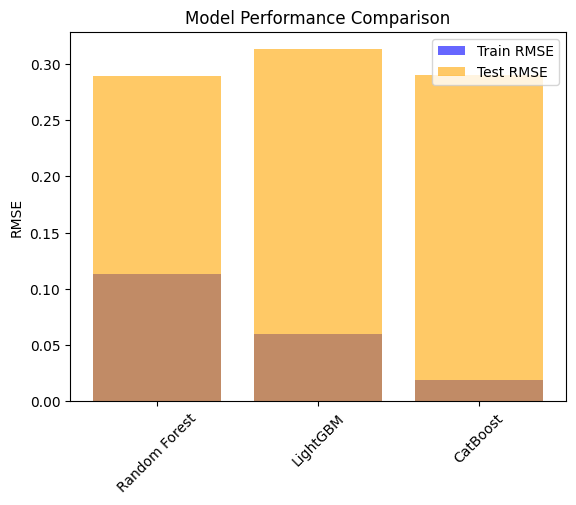

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Random Forest Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Tuned Random Forest: Train RMSE = 0.13854686594382137, Test RMSE = 0.2984709703396447
CatBoost with Early Stopping: Train RMSE = 0.018846963322029266, Test RMSE = 0.2897311692548381


In [ ]:
import opensmile
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Initialize OpenSMILE for feature extraction
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,

)

# Splitting data for training and evaluation
X = combined_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'Age', 'TrainOrDev'])
y = combined_df['Converted-MMSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization function
scaler = StandardScaler()


def calculate_rmse(model, X_train, X_test, y_train, y_test):
    """
    Fits the model, predicts on train and test sets, and calculates RMSE.
    """
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return rmse_train, rmse_test


# Define models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=200, max_depth=10, min_samples_split=5,
        min_samples_leaf=2, random_state=42
    ),
    'LightGBM': lgb.LGBMRegressor(
        n_estimators=200, max_depth=10, learning_rate=0.05,
        num_leaves=31, reg_alpha=0.1, reg_lambda=0.1, random_state=42
    ),
    'CatBoost': CatBoostRegressor(
        n_estimators=200, depth=8, learning_rate=0.05,
        l2_leaf_reg=3, random_state=42, silent=True
    )
}

# Train and evaluate models
results = {}
for name, model in models.items():
    rmse_train, rmse_test = calculate_rmse(model, X_train, X_test, y_train, y_test)
    results[name] = {'Train RMSE': rmse_train, 'Test RMSE': rmse_test}

# Print results
for name, metrics in results.items():
    print(f"{name}: Train RMSE = {metrics['Train RMSE']}, Test RMSE = {metrics['Test RMSE']}")

# Visualize RMSE results
names = list(results.keys())
train_rmse = [results[name]['Train RMSE'] for name in names]
test_rmse = [results[name]['Test RMSE'] for name in names]

plt.bar(names, train_rmse, color='blue', alpha=0.6, label='Train RMSE')
plt.bar(names, test_rmse, color='orange', alpha=0.6, label='Test RMSE')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Optional: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid,
    scoring='neg_mean_squared_error', n_iter=20, cv=5, random_state=42
)
rf_search.fit(scaler.fit_transform(X_train), y_train)

# Best parameters and RMSE after tuning
best_rf_model = rf_search.best_estimator_
best_rf_train_rmse, best_rf_test_rmse = calculate_rmse(
    best_rf_model, X_train, X_test, y_train, y_test
)

print(f"Best Random Forest Params: {rf_search.best_params_}")
print(f"Tuned Random Forest: Train RMSE = {best_rf_train_rmse}, Test RMSE = {best_rf_test_rmse}")

# Early stopping for CatBoost
catboost_model = CatBoostRegressor(
    n_estimators=200, depth=8, learning_rate=0.05,
    l2_leaf_reg=3, random_state=42, silent=True
)
catboost_model.fit(
    scaler.fit_transform(X_train), y_train,
    eval_set=(scaler.transform(X_test), y_test),
    early_stopping_rounds=50
)

catboost_rmse_train, catboost_rmse_test = calculate_rmse(
    catboost_model, X_train, X_test, y_train, y_test
)

print(f"CatBoost with Early Stopping: Train RMSE = {catboost_rmse_train}, Test RMSE = {catboost_rmse_test}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000579 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8153
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 264
[LightGBM] [Info] Start training from score 27.371870
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

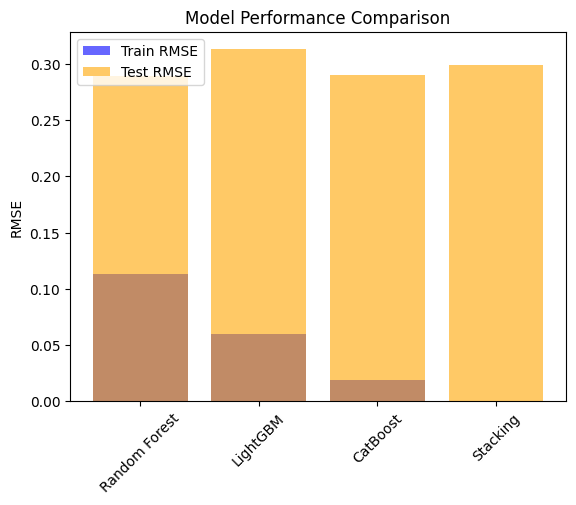

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Define base learners (models)
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)),
    ('lgbm', lgb.LGBMRegressor(n_estimators=200, max_depth=10, learning_rate=0.05, num_leaves=31, reg_alpha=0.1, reg_lambda=0.1, random_state=42)),
    ('catboost', CatBoostRegressor(n_estimators=200, depth=8, learning_rate=0.05, l2_leaf_reg=3, random_state=42, silent=True))
]

# Define meta-model (final estimator)
meta_model = RandomForestRegressor(random_state=42)

# Create stacking regressor
stacking_model = StackingRegressor(estimators=base_learners, final_estimator=meta_model)

# Train and predict
stacking_model.fit(X_train_scaled, y_train)
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Calculate RMSE
rmse_stacking = np.sqrt(mean_squared_error(y_test, y_pred_stacking))

# Print RMSE for stacking model
print(f"Stacking Model RMSE: {rmse_stacking}")

# Compare with individual models (e.g., Random Forest, LightGBM, and CatBoost)
results = {}
for name, model in models.items():
    rmse_train, rmse_test = calculate_rmse(model, X_train, X_test, y_train, y_test)
    results[name] = {'Train RMSE': rmse_train, 'Test RMSE': rmse_test}

results['Stacking'] = {'Train RMSE': np.nan, 'Test RMSE': rmse_stacking}  # Add stacking result

# Print results comparison
for name, metrics in results.items():
    print(f"{name}: Train RMSE = {metrics.get('Train RMSE', 'N/A')}, Test RMSE = {metrics['Test RMSE']}")

# Visualize RMSE results
names = list(results.keys())
train_rmse = [results[name].get('Train RMSE', np.nan) for name in names]
test_rmse = [results[name]['Test RMSE'] for name in names]

plt.bar(names, train_rmse, color='blue', alpha=0.6, label='Train RMSE')
plt.bar(names, test_rmse, color='orange', alpha=0.6, label='Test RMSE')
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Ensure only one row per Unique_ID in test_f
test_f_clean = test_f.drop_duplicates(subset=["Unique_ID"])

# Drop the Unique_ID column and any prediction columns that were previously added
test_features = test_f_clean.drop(columns=["Unique_ID"])

# Standardize the features (same scaler as used during training)
test_features_scaled = scaler.transform(test_features)

# Make predictions with all models for the test data
y_pred_rf_test = rf_model.predict(test_features_scaled)
y_pred_lgbm_test = lgbm_model.predict(test_features_scaled)
y_pred_catboost_test = catboost_model.predict(test_features_scaled)

# Add the predictions to the test_f dataframe
test_f_clean["RF_Predictions"] = y_pred_rf_test
test_f_clean["LGBM_Predictions"] = y_pred_lgbm_test
test_f_clean["CatBoost_Predictions"] = y_pred_catboost_test

# If you want to select only the best performing model's predictions, you can do something like:
# test_f_clean['Best_Predictions'] = np.argmin([rmse_rf, rmse_lgbm, rmse_catboost])  # This is an example

# Save the predictions to CSV
test_f_clean[["Unique_ID", "RF_Predictions", "LGBM_Predictions", "CatBoost_Predictions"]].to_csv('reg_predictions.csv', index=False)

# Display the predictions
print(test_f_clean[["Unique_ID", "RF_Predictions", "LGBM_Predictions", "CatBoost_Predictions"]])


   Unique_ID  RF_Predictions  LGBM_Predictions  CatBoost_Predictions
0        006       27.382688         27.475220             27.413495
1        010       27.405878         27.471013             27.403306
2        004       27.425685         27.451259             27.415632
3        003       27.392970         27.446084             27.383276
4        007       27.341165         27.279453             27.409984
5        008       27.421273         27.522498             27.444699
6        005       27.376920         27.462015             27.389368
7        009       27.303423         27.238059             27.400590
8        001       27.433970         27.522751             27.410365
9        002       27.369076         27.277528             27.388222
10       014       27.378819         27.266473             27.371562
11       018       27.350495         27.328125             27.424696
12       015       27.446631         27.328351             27.403958
13       012       27.342891      

In [ ]:
!pip install python-weka-wrapper3


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 36.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 17.4 MB/s eta 0:00:00
  Created wheel for python-weka-wrapper3: filename=python_weka_wrapper3-0.3.2-py3-none-any.whl size=14495848 sha256=b82016732477d5183b30e3a1c824e696ea53f7dfb3079c1fa3eb598b84d64bb4
  Stored in directory: /root/.cache/pip/wheels/67/6c/8b/ac3ddbec2fff91bdbedc52d8f6bdc2199bcec5338002f164ed
  Created wheel for configurable-objects: filename=configurable_objects-0.0.1-py3-none-any.whl size=4696 sha256=31687f854d340f78b2389e9f9c399bd208c9163ca6ad7804e42352e5b204b532
  Stored in directory: /root/.cache/pip/wheels/ef/11/bc/75ac8b0592c38dc42412942c37d3947faf0b222bad150132a1
  Created wheel for simple-data-flow: filename=simple_data_flow-0.0.1-py3-none-any.whl size=19058 sha2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Assuming your dataframe is called 'combined_df'
X = combined_df.drop(columns=['Converted-MMSE', 'Unique_ID', 'Class', 'Age', 'TrainOrDev'])
y = combined_df['Converted-MMSE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize SVM model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Calculate RMSE
rmse_svm = np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(f'SVM RMSE: {rmse_svm}')


SVM RMSE: 0.28236235385051534


In [ ]:
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate RMSE
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest RMSE: {rmse_rf}')


Random Forest RMSE: 0.2932317322817004


In [ ]:
# Initialize CatBoost model
catboost_model = CatBoostRegressor(n_estimators=200, learning_rate=0.05, depth=8, random_state=42, silent=True)

# Train the model
catboost_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_catboost = catboost_model.predict(X_test_scaled)

# Calculate RMSE
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
print(f'CatBoost RMSE: {rmse_catboost}')


CatBoost RMSE: 0.2897311692548381


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_reg_model.predict(X_test_scaled)

# Calculate RMSE (for regression task)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
print(f'Linear Regression RMSE: {rmse_linear}')


Linear Regression RMSE: 1.0297118917328552
